In [ ]:
#@title Importação de Bibliotecas
import matplotlib.pyplot as plt
import numpy as np

# Questão A

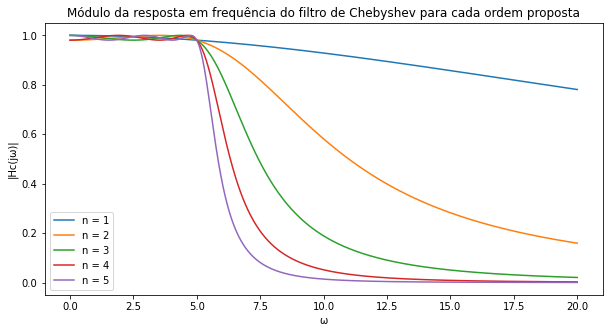

In [ ]:
#Calcula o módulo da resposta em frequencia do filtro de Chebyshev
#Parâmetros: ω - vetor de frequências; ωc - freq. de corte do filtro; n - ordem do filtro; ε - ganho na frequencia de corte
def filtro_Chebyshev(ω,ωc,n,ε):
  Tn = []
  Habs = [] #o modulo da resposta em frequencia do filtro
  for i in ω:
    if i < ωc:
      Tn.append(np.cos(n*np.arccos(i/ωc)))
    else:
      Tn.append(np.cosh(n*np.arccosh(i/ωc)))
    Habs.append(abs(1/np.sqrt(1+(ε**2)*(Tn[-1]**2))))
  return Habs

#sugestão: usar um vetor com amostras de 0 a 20 rad/s)
w = [round(x,2) for x in list(np.linspace(0,20,2000))]  #de 0 a 20 rad/s com um passo de 0.01 rad/s

#Respostas em frequência para cada respectivo valor de ordem do filtro para ωc=5 rad/s e ε = 0.2
Hc1 = filtro_Chebyshev(w,5,1,0.2) # Ordem n = 1
Hc2 = filtro_Chebyshev(w,5,2,0.2) # Ordem n = 2
Hc3 = filtro_Chebyshev(w,5,3,0.2) # Ordem n = 3
Hc4 = filtro_Chebyshev(w,5,4,0.2) # Ordem n = 4
Hc5 = filtro_Chebyshev(w,5,5,0.2) # Ordem n = 5

#plot do gráfico
plt.figure(figsize=[10,5])
plt.title("Módulo da resposta em frequência do filtro de Chebyshev para cada ordem proposta")
plt.plot(w,Hc1, label = "n = 1")
plt.plot(w,Hc2, label = "n = 2")
plt.plot(w,Hc3, label = "n = 3")
plt.plot(w,Hc4, label = "n = 4")
plt.plot(w,Hc5, label = "n = 5")
plt.legend(loc="lower left")
plt.xlabel("ω")
plt.ylabel("|Hc(jω)|")
plt.show()


# Questão B

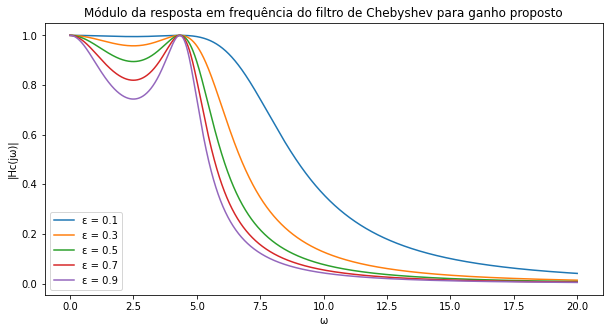

In [ ]:
#Respostas em frequência para cada respectivo valor de ε do filtro para ωc = 5 rad/s e ordem n = 3
Hc_1 = filtro_Chebyshev(w,5,3,0.1) # ε = 0.1
Hc_2 = filtro_Chebyshev(w,5,3,0.3) # ε = 0.3
Hc_3 = filtro_Chebyshev(w,5,3,0.5) # ε = 0.5
Hc_4 = filtro_Chebyshev(w,5,3,0.7) # ε = 0.7
Hc_5 = filtro_Chebyshev(w,5,3,0.9) # ε = 0.9

#plot do gráfico
plt.figure(figsize=[10,5])
plt.title("Módulo da resposta em frequência do filtro de Chebyshev para ganho proposto")
plt.plot(w,Hc_1, label = "ε = 0.1")
plt.plot(w,Hc_2, label = "ε = 0.3")
plt.plot(w,Hc_3, label = "ε = 0.5")
plt.plot(w,Hc_4, label = "ε = 0.7")
plt.plot(w,Hc_5, label = "ε = 0.9")
plt.legend(loc="lower left")
plt.xlabel("ω")
plt.ylabel("|Hc(jω)|")
plt.show()


# Questão C

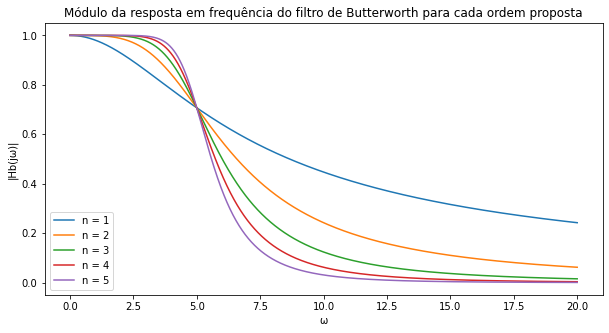

In [ ]:
#Calcula o módulo da resposta em frequencia do filtro de Butterworth
#Parâmetros: ω - vetor de frequências; ωc - freq. de corte do filtro; n - ordem do filtro
def filtro_Butterworth(ω,ωc,n):
    Habs = []
    for i in ω:
        Habs.append(abs(1/np.sqrt(1+((i/ωc)**(2*n)))))
    return Habs

#Respostas em frequência para cada respectivo valor de ordem do filtro para ωc=5 rad/s
Hb1 = filtro_Butterworth(w,5,1) # Ordem n = 1
Hb2 = filtro_Butterworth(w,5,2) # Ordem n = 2
Hb3 = filtro_Butterworth(w,5,3) # Ordem n = 3
Hb4 = filtro_Butterworth(w,5,4) # Ordem n = 4
Hb5 = filtro_Butterworth(w,5,5) # Ordem n = 5

#plot do gráfico
plt.figure(figsize=[10,5])
plt.title("Módulo da resposta em frequência do filtro de Butterworth para cada ordem proposta")
plt.plot(w,Hb1, label = "n = 1")
plt.plot(w,Hb2, label = "n = 2")
plt.plot(w,Hb3, label = "n = 3")
plt.plot(w,Hb4, label = "n = 4")
plt.plot(w,Hb5, label = "n = 5")
plt.legend(loc="lower left")
plt.xlabel("ω")
plt.ylabel("|Hb(jω)|")
plt.show()

# Questão D

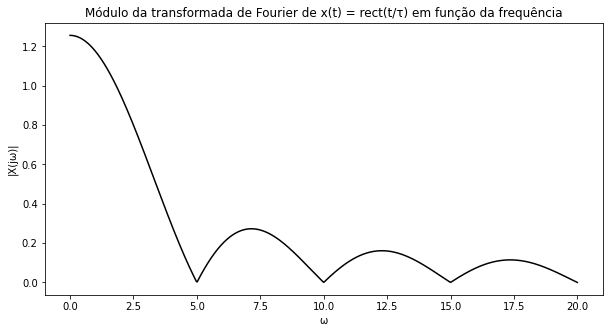

In [ ]:
#A transformada de Fourier de rect(t/τ) = τ*Sa(ωτ/2)
#Parâmetros: ω - vetor de frequências; τ - largura do retangulo
def transf_Fourier_rect(τ,ω):
  X = [] #resultado da transformada
  for i in ω:
      if i == 0: #no ponto de indeterminação X(jω) é τ
        X.append(τ)
      else:
        X.append((2/i)*np.sin(i*τ/2))
  return X

#Transformada de Fourier de rect(t/τ) para τ = 2*np.pi/ωc e ωc 5 rad/s
X_jw = transf_Fourier_rect(2*np.pi/5,w)

#modulo da Transformada de Fourier de x(t)
X_jw_modulo = [abs(x) for x in X_jw]

plt.figure(figsize=[10,5])
plt.title("Módulo da transformada de Fourier de x(t) = rect(t/τ) em função da frequência")
plt.plot(w, X_jw_modulo, color = 'k')
plt.xlabel("ω")
plt.ylabel("|X(jω)|")
plt.show()


# Questão E

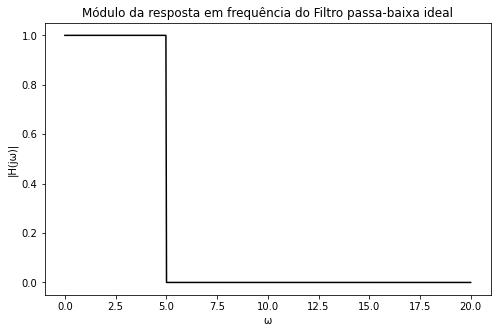

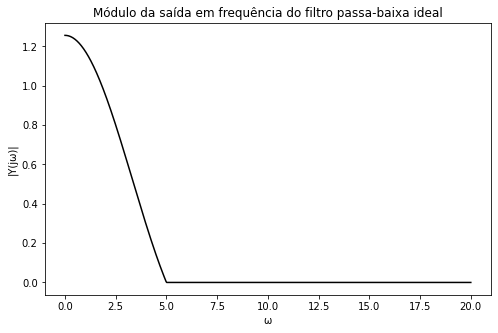

In [ ]:
#Resposta em frequência de um Filtro Passa-Baixa ideal e sua Saída
#Parâmetros: ω - vetor de frequências; ωc - freq. de corte do filtro
def H_FPB_ideal(ω, ωc, X_jω):
  H = [] #Resposta em frequência
  for i in ω:
    if i <= ωc:
      H.append(1)
    else:
      H.append(0)
  Y = [j*k for (j,k) in zip(H, X_jω)]
  return H, Y
#adotando o mesmo vetor dew frequencia w usado anteriormente e ωc = 5 rad/s, temos a resposta em frequencia e a saída:
H_FPB, Y_FPB = H_FPB_ideal(w, 5, X_jw)

#temos o módulo como
H_FPB_modulo = [abs(x) for x in H_FPB]
Y_FPB_modulo = [abs(x) for x in Y_FPB]

#Plot do Gráfico de |H(jω)|
plt.figure(figsize=[8,5])
plt.title("Módulo da resposta em frequência do Filtro passa-baixa ideal")
plt.plot(w, H_FPB_modulo, color = 'k')
plt.xlabel("ω")
plt.ylabel("|H(jω)|")
plt.show()

#Plot do Gráfico de |Y(jω)|
plt.figure(figsize=[8,5])
plt.title("Módulo da saída em frequência do filtro passa-baixa ideal")
plt.plot(w, Y_FPB_modulo, color = 'k')
plt.xlabel("ω")
plt.ylabel("|Y(jω)|")
plt.show()



# Questão F

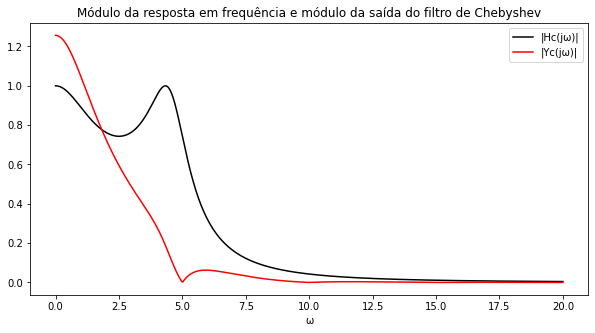

In [ ]:
#Resposta em frequência e saída Y(jω) do filtro de Chebyshev para ωc = 5 rad/s, ε = 0.9, n = 3 e X(jω) do item D
Hc_f = filtro_Chebyshev(w,5,3,0.9)
Yc_f_modulo = [j*k for (j,k) in zip(Hc_f, X_jw_modulo)]

plt.figure(figsize=[10,5])
plt.title("Módulo da resposta em frequência e módulo da saída do filtro de Chebyshev")
plt.plot(w, Hc_f, label = "|Hc(jω)|", color = 'k')
plt.plot(w, Yc_f_modulo, label = "|Yc(jω)|", color = 'r')
plt.xlabel("ω")
plt.legend(loc = "upper right")
plt.show()



# Questão G

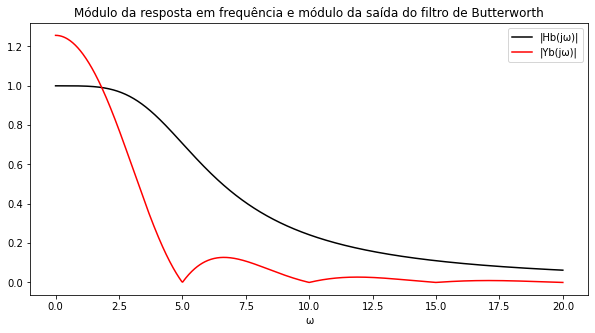

In [ ]:
#Resposta em frequência e saída Y(jω) do filtro de Butterworth para ωc = 5 rad/s, n = 2 e X(jω) do item D
Hb_G = filtro_Butterworth(w,5,2)
Yb_G_modulo = [j*k for (j,k) in zip(Hb_G, X_jw_modulo)]

plt.figure(figsize=[10,5])
plt.title("Módulo da resposta em frequência e módulo da saída do filtro de Butterworth")
plt.plot(w, Hb_G, label = "|Hb(jω)|", color = 'k')
plt.plot(w, Yb_G_modulo, label = "|Yb(jω)|", color = 'r')
plt.xlabel("ω")
plt.legend(loc = "upper right")
plt.show()

# Questão H

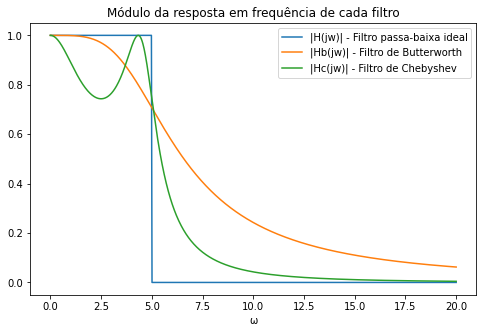

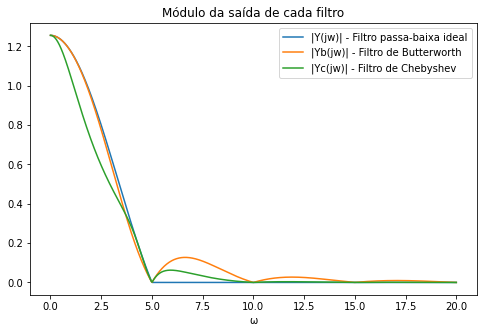

In [ ]:
#Gráficos:

#Gráfico 1:
plt.figure(figsize=[8,5])
plt.title("Módulo da resposta em frequência de cada filtro")
plt.plot(w, H_FPB_modulo, label = "|H(jw)| - Filtro passa-baixa ideal")
plt.plot(w, Hb_G, label = "|Hb(jw)| - Filtro de Butterworth")
plt.plot(w, Hc_f, label = "|Hc(jw)| - Filtro de Chebyshev")
plt.legend(loc="upper right")
plt.xlabel("ω")
plt.show()

#Gráfico 2:
plt.figure(figsize=[8,5])
plt.title("Módulo da saída de cada filtro")
plt.plot(w, Y_FPB_modulo, label = "|Y(jw)| - Filtro passa-baixa ideal")
plt.plot(w, Yb_G_modulo, label = "|Yb(jw)| - Filtro de Butterworth")
plt.plot(w, Yc_f_modulo, label = "|Yc(jw)| - Filtro de Chebyshev")
plt.legend(loc="upper right")
plt.xlabel("ω")
plt.show()
